# 🌐 Base de Données de l'Étude


## Phase 1: Récupération et Visualisation des Régions de France

Ce code télécharge les données géographiques des régions françaises, calcule leurs centroïdes et affiche une carte. Les centroïdes sont extraits pour chaque région et stockés sous forme de triplets (region, longitude, latitude) pour une utilisation ultérieure.

In [ ]:
#Installation des bibliothèques nécessaires pour la récupération et la représentation des données géographiques
!pip install contextily && geopandas &&  topojson && py7zr && openpyxl && tqdm && s3fs && pandas && fiona && shapely && pyproj && rtree
!pip install PyYAML xlrd && git+https://github.com/inseefrlab/cartiflette && git+https://github.com/inseeFrLab/cartiflette.git && openmeteo-requests
!pip install requests-cache retry-requests 
!pip install geopandas
!pip install cartiflette

In [42]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [43]:
# Récupératoin des données 

from cartiflette import carti_download

france = carti_download(
    values=["France"],
    crs=4326,
    borders="REGION",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)


In [44]:
france.head()

,INSEE_REG,PAYS,LIBELLE_REGION,POPULATION,SOURCE,geometry
0,1,France,Guadeloupe,384239,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-61.62648 16.27275, -61.62658 ..."
1,3,France,Guyane,281678,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-51.6408 4.21282, -51.64144 4...."
2,2,France,Martinique,364508,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-60.93246 14.7306, -60.9326 14..."
3,6,France,Mayotte,256518,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((45.08357 -12.96139, 45.08547 -..."
4,84,France,Auvergne-Rhône-Alpes,8042936,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"POLYGON ((6.06386 46.41639, 6.06267 46.4168, 6..."


In [45]:
print(france.crs)

EPSG:4326


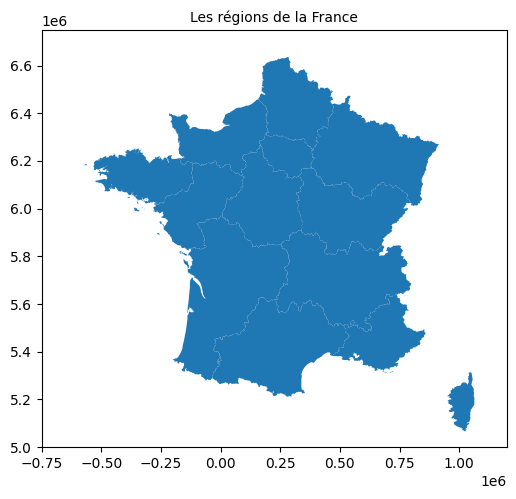

In [46]:
#REPRESENTATION 

if france.crs.to_string() != "EPSG:3857":
    france = france.to_crs(epsg=3857)
#Les  limites de la carte
xmin, xmax = -0.75e6, 1.2e6  # Convertir les limites en mètres (EPSG:3857)
ymin, ymax = 5e6, 6.75e6

#Ploting
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
france.plot(ax=ax)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
plt.title("Les régions de la France", fontsize=10)
plt.show()


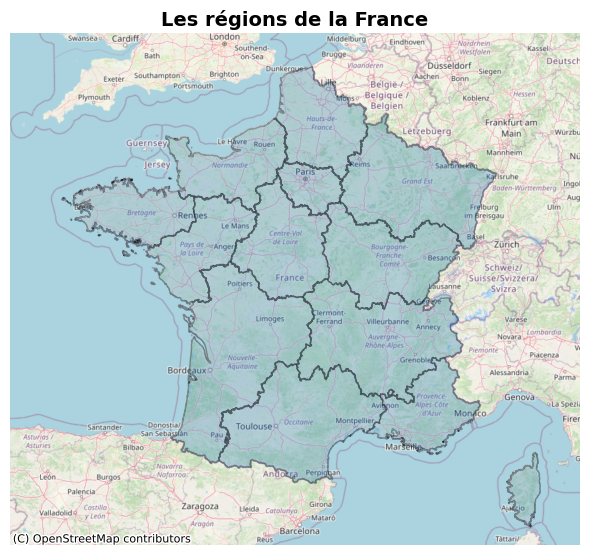

In [47]:
# Ajout d'un fond de carte pour un meilleur contexte géographique
fig, ax = plt.subplots(1, 1, figsize=(6, 6)) 
france.plot(ax=ax, edgecolor='black', linewidth=1, alpha=0.3)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# 
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=france.crs)
#
plt.title("Les régions de la France", fontsize=14, fontweight='bold')
ax.axis('off') 

plt.tight_layout() 
plt.show()


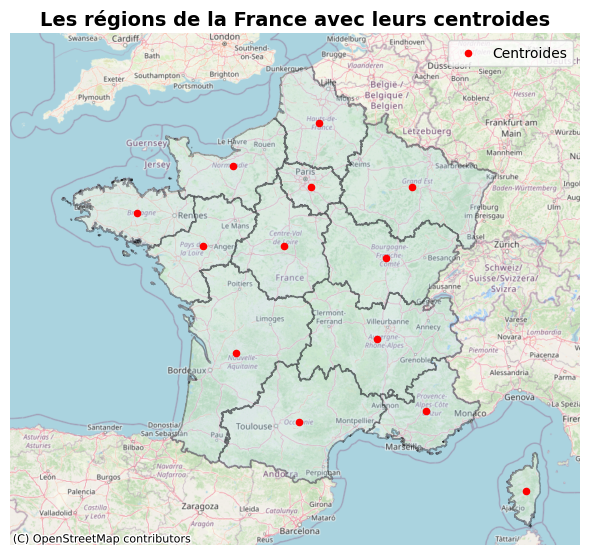

In [48]:
#Représentation des centroides 
france['centroid'] = france.geometry.centroid
france['longitude'] = france.centroid.x
france['latitude'] = france.centroid.y
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
france.plot(ax=ax, edgecolor='black', linewidth=1, alpha=0.3, color='lightblue')
ax.scatter(france['longitude'], france['latitude'], color='red', s=20, label='Centroides')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=france.crs)
plt.title("Les régions de la France avec leurs centroides", fontsize=14, fontweight='bold')
ax.axis('off')
ax.legend()
plt.tight_layout()
plt.show()

In [49]:
# Calcul des longitudes et latitudes 
france = france.to_crs(epsg=4326)
france['longitude'] = france.geometry.centroid.x
france['latitude'] = france.geometry.centroid.y
print(france[['LIBELLE_REGION', 'longitude', 'latitude']])


                LIBELLE_REGION  longitude   latitude
0                   Guadeloupe -61.539833  16.197646
1                       Guyane -53.239940   3.915167
2                   Martinique -61.019379  14.654871
3                      Mayotte  45.147435 -12.820617
4         Auvergne-Rhône-Alpes   4.536119  45.514642
5                    Occitanie   2.143923  43.702500
6                     Bretagne  -2.841463  48.177549
7           Nouvelle-Aquitaine   0.212719  45.206040
8                    Normandie   0.110932  49.120067
9   Provence-Alpes-Côte d'Azur   6.061005  43.958789
10            Pays de la Loire  -0.816786  47.478104
11                   Grand Est   5.613112  48.688977
12     Bourgogne-Franche-Comté   4.806857  47.234282
13               Île-de-France   2.503401  48.709316
14         Centre-Val de Loire   1.684391  47.484775
15             Hauts-de-France   2.771303  49.969594
16                       Corse   9.106152  42.151511
17                  La Réunion  55.532509 -21.

C:\Users\nouts\AppData\Local\Temp\ipykernel_15208\2487130668.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  france['longitude'] = france.geometry.centroid.x
C:\Users\nouts\AppData\Local\Temp\ipykernel_15208\2487130668.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  france['latitude'] = france.geometry.centroid.y


In [50]:
france.head()

,INSEE_REG,PAYS,LIBELLE_REGION,POPULATION,SOURCE,geometry,centroid,longitude,latitude
0,1,France,Guadeloupe,384239,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-61.62648 16.27275, -61.62658 ...",POINT (-6850582.542 1827642.261),-61.539833,16.197646
1,3,France,Guyane,281678,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-51.6408 4.21282, -51.64144 4....",POINT (-5926644.81 436331.726),-53.239940,3.915167
2,2,France,Martinique,364508,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-60.93246 14.7306, -60.9326 14...",POINT (-6792650.367 1649468.223),-61.019379,14.654871
3,6,France,Mayotte,256518,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((45.08357 -12.96139, 45.08547 -...",POINT (5025789.843 -1439250.269),45.147435,-12.820617
4,84,France,Auvergne-Rhône-Alpes,8042936,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"POLYGON ((6.06386 46.41639, 6.06267 46.4168, 6...",POINT (504837.95 5704315.458),4.536119,45.514642


In [51]:
# Création de la liste de triplets (région, longitude, latitude)
region_centroides = []
for index, row in france.iterrows():
    region = row['LIBELLE_REGION']  # Nom de la région
    longitude = row['longitude']  # Longitude du centroïde
    latitude = row['latitude']    # Latitude du centroïde
    region_centroides.append((region, longitude, latitude)) # Ajout du triplet à la liste
region_centroides

[('Guadeloupe', -61.53983304107784, 16.197645826552904),
 ('Guyane', -53.23993971851178, 3.915166862499844),
 ('Martinique', -61.019378740773654, 14.654870858984358),
 ('Mayotte', 45.14743542382146, -12.820616875536656),
 ('Auvergne-Rhône-Alpes', 4.536118586333609, 45.51464202656834),
 ('Occitanie', 2.143922833937654, 43.70250024549978),
 ('Bretagne', -2.841462676465886, 48.17754922086023),
 ('Nouvelle-Aquitaine', 0.21271860548694332, 45.2060395396088),
 ('Normandie', 0.11093239896467046, 49.12006667987373),
 ("Provence-Alpes-Côte d'Azur", 6.061004522552231, 43.95878857291765),
 ('Pays de la Loire', -0.81678598261894, 47.47810354487287),
 ('Grand Est', 5.613112231600144, 48.68897740160863),
 ('Bourgogne-Franche-Comté', 4.806856915301157, 47.2342819451994),
 ('Île-de-France', 2.503401392552759, 48.70931550109074),
 ('Centre-Val de Loire', 1.684391322381998, 47.48477508284454),
 ('Hauts-de-France', 2.7713028658475474, 49.969593961262426),
 ('Corse', 9.106151755156151, 42.15151137562012),

# Phase 2: Collecte des Données de Qualité de l'Air

Ce script collecte des **données horaires de qualité de l'air** via l'API Open-Meteo pour différentes régions. 
Il récupère les polluants clés (**PM10**, **PM2.5**, **CO**, **NO₂**, **SO₂**, **Ozone**) 
et les organise dans un tableau structuré.

---

## **Fonctionnalités**
- Utilisation d'un **cache** et de **répétitions automatiques** pour des requêtes fiables.
- Organisation des données dans des **DataFrames pandas**.
- Ajout d'une colonne pour **extraire les dates** sans les heures.
- Fusion des données pour une **analyse centralisée**.


Nous allons aussi collecter quelques données climatiques dans le but de voir si ses données nous permettent d'améliorer nos prévisions 





***** Récupération des données sur la qualité de l'air 

In [52]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
from openmeteo_requests import Client


# Création d'une session avec cache
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = Client(session=retry_session)

# Création d'un dictionnaire pour stocker les DataFrames
region_dataframes = {}

# Boucle pour récupérer les données pour chaque région
for region, longitude, latitude in region_centroides:
    try:
        url = "https://air-quality-api.open-meteo.com/v1/air-quality"
        params = {
            "latitude": latitude,
            "longitude": longitude,
            "current": ["european_aqi", "us_aqi"],
            "hourly": ["pm10", "pm2_5", "carbon_monoxide", "carbon_dioxide", "nitrogen_dioxide", "sulphur_dioxide", "ozone"],
            "start_date": "2023-01-01",
            "end_date": "2024-11-30"
        }

        responses = openmeteo.weather_api(url, params=params)
        response = responses[0]  # Première réponse, si plusieurs localisations

        # Récupération des données horaires
        hourly = response.Hourly()
        hourly_data = {
            "date": pd.date_range(
                start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=hourly.Interval()),
                inclusive="left"
            ),
            "region": [region] * len(pd.date_range(
                start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=hourly.Interval()),
                inclusive="left"
            )),
            "pm10": hourly.Variables(0).ValuesAsNumpy(),
            "pm2_5": hourly.Variables(1).ValuesAsNumpy(),
            "carbon_monoxide": hourly.Variables(2).ValuesAsNumpy(),
            "carbon_dioxide": hourly.Variables(3).ValuesAsNumpy(),
            "nitrogen_dioxide": hourly.Variables(4).ValuesAsNumpy(),
            "sulphur_dioxide": hourly.Variables(5).ValuesAsNumpy(),
            "ozone": hourly.Variables(6).ValuesAsNumpy()
        }

        # Stockage du DataFrame dans le dictionnaire
        region_dataframes[region] = pd.DataFrame(data=hourly_data)

    except Exception as e:
        print(f"Erreur lors de la récupération des données pour {region}: {e}")

# Concaténation tous les DataFrames
combined_dataframe_air = pd.concat(region_dataframes.values(), ignore_index=True)
combined_dataframe_air['date'] = pd.to_datetime(combined_dataframe_air['date'])
# Création d'une nouvelle colonne 'day' contenant uniquement la date (sans l'heure)
#combined_dataframe_air['day'] = combined_dataframe_air['date'].dt.date
combined_dataframe_air.insert(1,"day",combined_dataframe_air["date"].dt.date)



In [53]:
combined_dataframe_air

,date,day,region,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone
0,2023-01-01 00:00:00+00:00,2023-01-01,Guadeloupe,20.500000,11.3,89.0,NaN,3.70,0.30,62.0
1,2023-01-01 01:00:00+00:00,2023-01-01,Guadeloupe,21.700001,11.9,89.0,NaN,3.45,0.30,62.0
2,2023-01-01 02:00:00+00:00,2023-01-01,Guadeloupe,21.799999,12.0,88.0,NaN,3.15,0.25,63.0
3,2023-01-01 03:00:00+00:00,2023-01-01,Guadeloupe,20.700001,11.4,88.0,NaN,2.60,0.25,64.0
4,2023-01-01 04:00:00+00:00,2023-01-01,Guadeloupe,19.400000,10.7,88.0,NaN,2.10,0.25,64.0
...,...,...,...,...,...,...,...,...,...,...
302395,2024-11-30 19:00:00+00:00,2024-11-30,La Réunion,10.000000,7.1,100.0,459.0,3.60,2.50,56.0
302396,2024-11-30 20:00:00+00:00,2024-11-30,La Réunion,9.800000,7.1,95.0,455.0,4.20,2.30,52.0
302397,2024-11-30 21:00:00+00:00,2024-11-30,La Réunion,9.700000,7.0,91.0,453.0,4.50,2.20,49.0
302398,2024-11-30 22:00:00+00:00,2024-11-30,La Réunion,9.500000,6.9,90.0,455.0,4.40,2.10,47.0


***********  Quelques données climatiques 

In [54]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
from openmeteo_requests import Client

# Création d'une session avec cache
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = Client(session=retry_session)

# Création d'un dictionnaire pour stocker les DataFrames
region_dataframes = {}

# Boucle pour récupérer les données pour chaque région
for region, longitude, latitude in region_centroides:
    try:
        url = "https://archive-api.open-meteo.com/v1/archive"
        params = {
            "latitude": latitude,
            "longitude": longitude,
            "hourly": ["temperature_2m", "relative_humidity_2m", "precipitation", "surface_pressure", "wind_speed_10m", "soil_temperature_0_to_7cm", "soil_moisture_0_to_7cm"],
            "start_date": "2023-01-01",
            "end_date": "2024-11-30"
        }

        responses = openmeteo.weather_api(url, params=params)
        response = responses[0]  # Première réponse, si plusieurs localisations

        # Récupération des données horaires
        hourly = response.Hourly()
        hourly_data = {
            "date": pd.date_range(
                start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=hourly.Interval()),
                inclusive="left"
            ),
            "region": [region] * len(pd.date_range(
                start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=hourly.Interval()),
                inclusive="left"
            )),
            "temperature_2m": hourly.Variables(0).ValuesAsNumpy(),
            "relative_humidity_2m": hourly.Variables(1).ValuesAsNumpy(),
            "precipitation": hourly.Variables(2).ValuesAsNumpy(),
            "surface_pressure": hourly.Variables(3).ValuesAsNumpy(),
            "wind_speed_10m": hourly.Variables(4).ValuesAsNumpy(),
            "soil_temperature_0_to_7cm": hourly.Variables(5).ValuesAsNumpy(),
            "soil_moisture_0_to_7cm": hourly.Variables(6).ValuesAsNumpy(),
            
        }

        # Stockage du DataFrame dans le dictionnaire
        region_dataframes[region] = pd.DataFrame(data=hourly_data)

    except Exception as e:
        print(f"Erreur lors de la récupération des données pour {region}: {e}")
        
    # Concaténation de tous les DataFrames
combined_dataframe_climat = pd.concat(region_dataframes.values(), ignore_index=True)
combined_dataframe_climat = combined_dataframe_climat.drop(columns=["region","date"])

### Combinaisons des deux Dataframes

In [55]:
df=pd.concat([combined_dataframe_air,combined_dataframe_climat],axis=1)
df

,date,day,region,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,precipitation,surface_pressure,wind_speed_10m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm
0,2023-01-01 00:00:00+00:00,2023-01-01,Guadeloupe,20.500000,11.3,89.0,NaN,3.70,0.30,62.0,23.770000,84.863304,0.0,1017.400024,9.422101,24.020000,0.501
1,2023-01-01 01:00:00+00:00,2023-01-01,Guadeloupe,21.700001,11.9,89.0,NaN,3.45,0.30,62.0,23.719999,85.643173,0.0,1017.599976,9.885262,23.670000,0.499
2,2023-01-01 02:00:00+00:00,2023-01-01,Guadeloupe,21.799999,12.0,88.0,NaN,3.15,0.25,63.0,23.520000,86.947586,0.0,1017.700012,9.720000,23.420000,0.498
3,2023-01-01 03:00:00+00:00,2023-01-01,Guadeloupe,20.700001,11.4,88.0,NaN,2.60,0.25,64.0,23.270000,88.269188,0.0,1017.400024,7.559999,23.219999,0.497
4,2023-01-01 04:00:00+00:00,2023-01-01,Guadeloupe,19.400000,10.7,88.0,NaN,2.10,0.25,64.0,22.469999,94.082932,0.2,1017.299988,8.825508,23.020000,0.497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302395,2024-11-30 19:00:00+00:00,2024-11-30,La Réunion,10.000000,7.1,100.0,459.0,3.60,2.50,56.0,10.291500,93.833534,0.0,824.523071,3.617955,12.941500,0.235
302396,2024-11-30 20:00:00+00:00,2024-11-30,La Réunion,9.800000,7.1,95.0,455.0,4.20,2.30,52.0,9.891500,93.814590,0.0,823.957458,3.847960,12.441500,0.235
302397,2024-11-30 21:00:00+00:00,2024-11-30,La Réunion,9.700000,7.0,91.0,453.0,4.50,2.20,49.0,9.391500,97.342743,0.0,823.007019,3.065289,11.991500,0.234
302398,2024-11-30 22:00:00+00:00,2024-11-30,La Réunion,9.500000,6.9,90.0,455.0,4.40,2.10,47.0,8.891500,99.663048,0.0,822.137085,2.979530,11.591500,0.234


## 🌍 Phase 3: Calcul de l'Indice ATMO

L'**indice ATMO** est utilisé en France pour évaluer la qualité de l'air en se basant sur cinq principaux polluants : **PM10**, **PM2.5**, **NO₂**, **O₃**, et **SO₂**. 

Il synthétise ces données en un indicateur unique, simple à interpréter.

---

### 🛠️ **Méthode de Calcul**

#### **1. Calcul des Sous-Indices**
Chaque polluant se voit attribuer un **sous-indice** en fonction de sa concentration moyenne journalière 

(ou glissante pour certains polluants). Les seuils sont définis comme suit :

| **Sous-indice** | **PM10 (µg/m³)** | **PM2.5 (µg/m³)** | **NO₂ (µg/m³)** | **O₃ (µg/m³)** | **SO₂ (µg/m³)** |
|-----------------|------------------|-------------------|-----------------|----------------|-----------------|
| 1 (Très bon)   | 0 - 6            | 0 - 5             | 0 - 29          | 0 - 29         | 0 - 39          |
| 2              | 7 - 13           | 6 - 10            | 30 - 54         | 30 - 54        | 40 - 79         |
| 3              | 14 - 20          | 11 - 15           | 55 - 84         | 55 - 79        | 80 - 119        |
| 4              | 21 - 27          | 16 - 20           | 85 - 109        | 80 - 104       | 120 - 159       |
| 5              | 28 - 34          | 21 - 25           | 110 - 134       | 105 - 129      | 160 - 199       |
| 6              | 35 - 41          | 26 - 30           | 135 - 164       | 130 - 149      | 200 - 249       |
| 7              | 42 - 49          | 31 - 40           | 165 - 199       | 150 - 179      | 250 - 299       |
| 8              | 50 - 64          | 41 - 50           | 200 - 274       | 180 - 209      | 300 - 399       |
| 9              | 65 - 79          | 51 - 75           | 275 - 399       | 210 - 239      | 400 - 499       |
| 10 (Très mauvais) | ≥ 80          | ≥ 76              | ≥ 400           | ≥ 240          | ≥ 500           |

### **2. Détermination de l'Indice Final**
L'**indice ATMO** correspond au **sous-indice le plus élevé** parmi les cinq polluants mesurés sur une journée. 

Cela signifie que le polluant le plus préoccupant domine l'indicateur global.

---

## 📊 **Échelle de Qualité de l'Air**

| **Indice ATMO** | **Niveau de Qualité** | **Couleur Associée** |
|------------------|-----------------------|-----------------------|
| 1-2             | Très bon              | 🟢 Vert clair         |
| 3-4             | Bon                   | 🟢 Vert               |
| 5               | Moyen                 | 🟡 Jaune              |
| 6-7             | Médiocre              | 🟠 Orange             |
| 8-9             | Mauvais               | 🔴 Rouge              |
| 10              | Très mauvais          | 🟣 Violet             |

---

## 🔗 **Référence Officielle**
Pour plus de détails, consultez la page officielle de l'indice ATMO sur [Atmo France](https://www.atmo-france.org/article/lindice-atmo).


In [56]:
# Convert 'date' and 'day' columns to datetime
df['date'] = pd.to_datetime(df['date'])
df['day'] = pd.to_datetime(df['day'])

# Sort data by 'region', 'day', and 'date'
df = df.sort_values(by=['region', 'day', 'date'])

# Define functions to compute sub-indices for each pollutant
def get_subindex_pm10(value):
    if value <= 6: return 1
    elif value <= 13: return 2
    elif value <= 20: return 3
    elif value <= 27: return 4
    elif value <= 34: return 5
    elif value <= 41: return 6
    elif value <= 49: return 7
    elif value <= 64: return 8
    elif value <= 79: return 9
    else: return 10

def get_subindex_pm2_5(value):
    if value <= 5: return 1
    elif value <= 10: return 2
    elif value <= 15: return 3
    elif value <= 20: return 4
    elif value <= 25: return 5
    elif value <= 30: return 6
    elif value <= 40: return 7
    elif value <= 50: return 8
    elif value <= 75: return 9
    else: return 10

def get_subindex_no2(value):
    if value <= 29: return 1
    elif value <= 54: return 2
    elif value <= 84: return 3
    elif value <= 109: return 4
    elif value <= 134: return 5
    elif value <= 164: return 6
    elif value <= 199: return 7
    elif value <= 274: return 8
    elif value <= 399: return 9
    else: return 10

def get_subindex_o3(value):
    if value <= 29: return 1
    elif value <= 54: return 2
    elif value <= 79: return 3
    elif value <= 104: return 4
    elif value <= 129: return 5
    elif value <= 149: return 6
    elif value <= 179: return 7
    elif value <= 209: return 8
    elif value <= 239: return 9
    else: return 10

def get_subindex_so2(value):
    if value <= 39: return 1
    elif value <= 79: return 2
    elif value <= 119: return 3
    elif value <= 159: return 4
    elif value <= 199: return 5
    elif value <= 249: return 6
    elif value <= 299: return 7
    elif value <= 399: return 8
    elif value <= 499: return 9
    else: return 10

# Calcul des moyennes journalières pour toutes les variables
daily_data = df.groupby(['day', 'region']).agg({
    'pm10': 'mean',
    'pm2_5': 'mean',
    'nitrogen_dioxide': 'mean',
    'ozone': lambda x: x.rolling(8, min_periods=1).mean().max(),  # Max sur 8h glissantes
    'sulphur_dioxide': 'mean',
    **{col: 'mean' for col in df.columns if col not in ['date', 'day', 'region', 'pm10', 'pm2_5', 'nitrogen_dioxide', 'ozone', 'sulphur_dioxide']}
}).reset_index()

# Calculer les sous-indices
daily_data['subindex_pm10'] = daily_data['pm10'].apply(get_subindex_pm10)
daily_data['subindex_pm2_5'] = daily_data['pm2_5'].apply(get_subindex_pm2_5)
daily_data['subindex_no2'] = daily_data['nitrogen_dioxide'].apply(get_subindex_no2)
daily_data['subindex_o3'] = daily_data['ozone'].apply(get_subindex_o3)
daily_data['subindex_so2'] = daily_data['sulphur_dioxide'].apply(get_subindex_so2)

# Calcul de l'indice Atmo final
daily_data['indice_atmo'] = daily_data[[
    'subindex_pm10', 'subindex_pm2_5', 'subindex_no2', 'subindex_o3', 'subindex_so2'
]].max(axis=1)

# Fusionner avec le DataFrame original pour conserver uniquement les colonnes de df
final_df = df[['day', 'region']].drop_duplicates().merge(daily_data, on=['day', 'region'], how='left')

# Afficher le résultat final
final_df


,day,region,pm10,pm2_5,nitrogen_dioxide,ozone,sulphur_dioxide,carbon_monoxide,carbon_dioxide,temperature_2m,...,surface_pressure,wind_speed_10m,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm,subindex_pm10,subindex_pm2_5,subindex_no2,subindex_o3,subindex_so2,indice_atmo
0,2023-01-01,Auvergne-Rhône-Alpes,14.954166,7.858334,3.475000,65.125,0.837500,118.791664,NaN,11.954083,...,964.791809,23.574928,10.964500,0.365333,3,2,1,3,1,3
1,2023-01-02,Auvergne-Rhône-Alpes,14.316667,7.962500,5.904167,71.000,0.933333,136.208328,NaN,10.583250,...,965.794250,15.330505,10.477000,0.384500,3,2,1,3,1,3
2,2023-01-03,Auvergne-Rhône-Alpes,8.666667,6.525000,11.420834,53.750,0.729167,170.833328,NaN,6.727000,...,971.449707,5.034335,7.685333,0.411792,2,2,1,2,1,2
3,2023-01-04,Auvergne-Rhône-Alpes,15.504167,11.441667,17.929167,37.875,1.075000,194.125000,NaN,5.220750,...,972.121399,4.557892,5.731167,0.387917,3,3,1,2,1,3
4,2023-01-05,Auvergne-Rhône-Alpes,11.616666,9.070833,12.416667,44.375,0.725000,170.000000,NaN,7.531167,...,968.975586,5.073804,7.256167,0.384125,2,2,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,2024-11-26,Île-de-France,12.691667,8.512500,13.220833,57.375,0.916667,193.083328,449.125000,8.658334,...,1014.152649,11.292778,8.785417,0.402167,2,2,1,3,1,3
12596,2024-11-27,Île-de-France,7.362500,5.725000,11.762500,62.750,0.775000,171.625000,446.583344,10.439584,...,1012.352295,17.599253,9.512501,0.395292,2,2,1,3,1,3
12597,2024-11-28,Île-de-France,14.870833,12.295834,19.445833,45.000,1.537500,227.041672,459.791656,6.358334,...,1022.028015,6.830119,7.887500,0.391583,3,3,1,2,1,3
12598,2024-11-29,Île-de-France,14.041667,11.537499,12.087501,53.250,0.920833,207.750000,450.000000,3.558333,...,1023.345276,9.613878,4.350000,0.386667,3,3,1,2,1,3
